In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [91]:
# Data collection and Preprocessing
# Loading dataset.

def load_dataset():
    df = pd.read_csv('/content/sample_data/auto_costs.csv')
    return df


cars_dataset = load_dataset()

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
# Make summarize to our dataset.

def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())


print_summarize_dataset(cars_dataset)

Dataset dimension:
(205, 26)
First 10 rows of dataset:
   ID  symboling                      name fueltypes aspiration doornumbers  \
0   1          3        alfa-romero giulia       gas        std         two   
1   2          3       alfa-romero stelvio       gas        std         two   
2   3          1  alfa-romero Quadrifoglio       gas        std         two   
3   4          2               audi 100 ls       gas        std        four   
4   5          2                audi 100ls       gas        std        four   
5   6          2                  audi fox       gas        std         two   
6   7          1                audi 100ls       gas        std        four   
7   8          1                 audi 5000       gas        std        four   
8   9          1                 audi 4000       gas      turbo        four   
9  10          0       audi 5000s (diesel)       gas      turbo         two   

       carbody drivewheels enginelocation  wheelbase  carlength  carwidth  

Symboling corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale.

In [94]:
# Let's swap columns: symboling and name
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df


swap_columns(cars_dataset, 'symboling', 'name')

,ID,name,symboling,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi 100 ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi 100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,volvo 145e (sw),-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,volvo 144ea,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,volvo 244dl,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,volvo 246,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [95]:
# let's add to dataset new column 'company'
cars_dataset['company'] = cars_dataset['name'].str.split(expand=True)[[0]]
cars_dataset.company.value_counts()
cars_dataset

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [96]:
# Let's get more information.

cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [97]:
# Check the number of missing values
cars_dataset.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
company             0
dtype: int64

In [98]:
# Let's check the distribution of categorical data
def check_categ_columns(dataset):
    print(dataset.fueltypes.value_counts())
    print(dataset.aspiration.value_counts())
    print(dataset.doornumbers.value_counts())
    print(dataset.carbody.value_counts())
    print(dataset.drivewheels.value_counts())
    print(dataset.enginelocation.value_counts())
    print(dataset.enginetype.value_counts())
    print(dataset.cylindernumber.value_counts())
    print(dataset.fuelsystem.value_counts())


check_categ_columns(cars_dataset)

gas       185
diesel     20
Name: fueltypes, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumbers, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheels, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


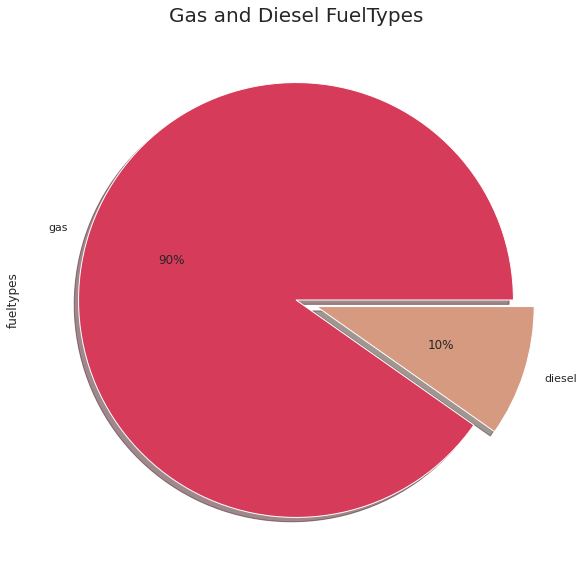

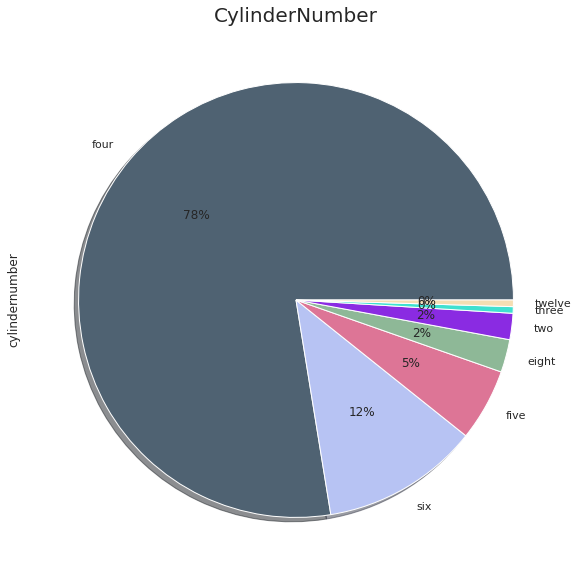

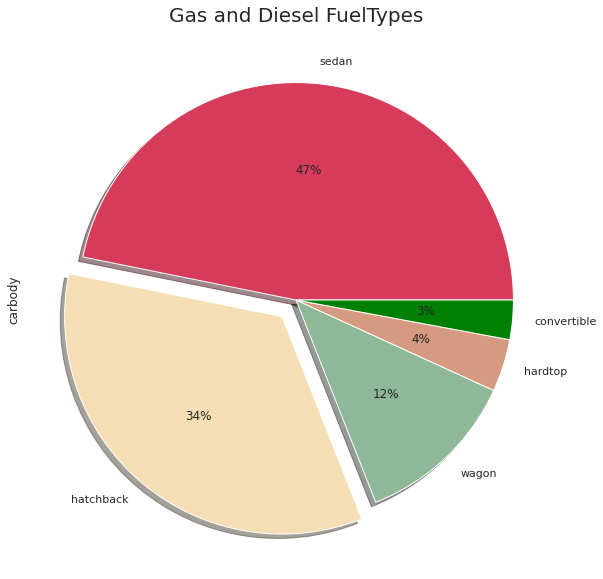

In [99]:
# Let's Vizualize our dataset

def categ_features(dataset):

    # Plot free and paid apps
    free_vs_paid = dataset.fueltypes.value_counts()
    sns.set()
    plt.title('Gas and Diesel FuelTypes', fontsize = 20)
    free_vs_paid.plot.pie(figsize=(20, 10), explode=(0.0, 0.1), colors=["#D63B59", "#D69A80"], autopct='%.0f%%', shadow=True)
    plt.show()

    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', 'blueviolet', 'turquoise', 'wheat']
    cylind = dataset.cylindernumber.value_counts()
    sns.set()
    plt.title('CylinderNumber', fontsize = 20)
    cylind.plot.pie(figsize=(20, 10), colors=colors, autopct='%.0f%%', shadow=True)
    plt.show()

    carbody_f = dataset.carbody.value_counts()
    sns.set()
    plt.title('Gas and Diesel FuelTypes', fontsize = 20)
    carbody_f.plot.pie(figsize=(20, 10), explode=(0.0, 0.1, 0.0, 0.0, 0.0), colors=["#D63B59", "wheat", '#8EB897', '#D69A80', 'green'], autopct='%.0f%%', shadow=True)
    plt.show()


categ_features(cars_dataset)

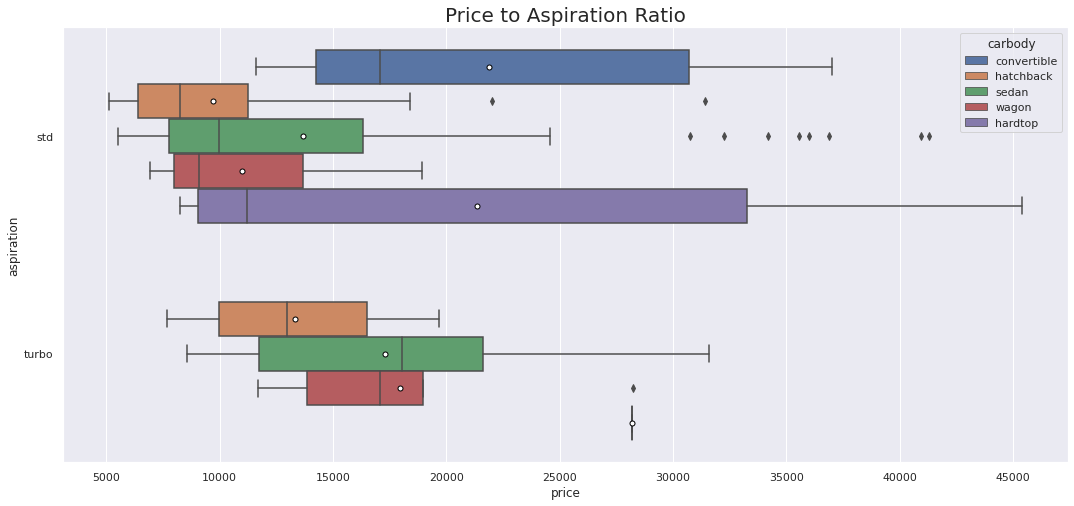

In [100]:
def price_to_aspiration_ratio(dataset):
    plt.figure(figsize = (18, 8))
    plt.title('Price to Aspiration Ratio', fontsize = 20)
    sns.boxplot(x='price', y='aspiration', hue='carbody', data=dataset, showmeans=True, meanprops={'marker':'o', 
                                                                                            'markerfacecolor':'white', 
                                                                                            'markersize': 5, 
                                                                                            'markeredgecolor':'black'})
    

price_to_aspiration_ratio(cars_dataset)

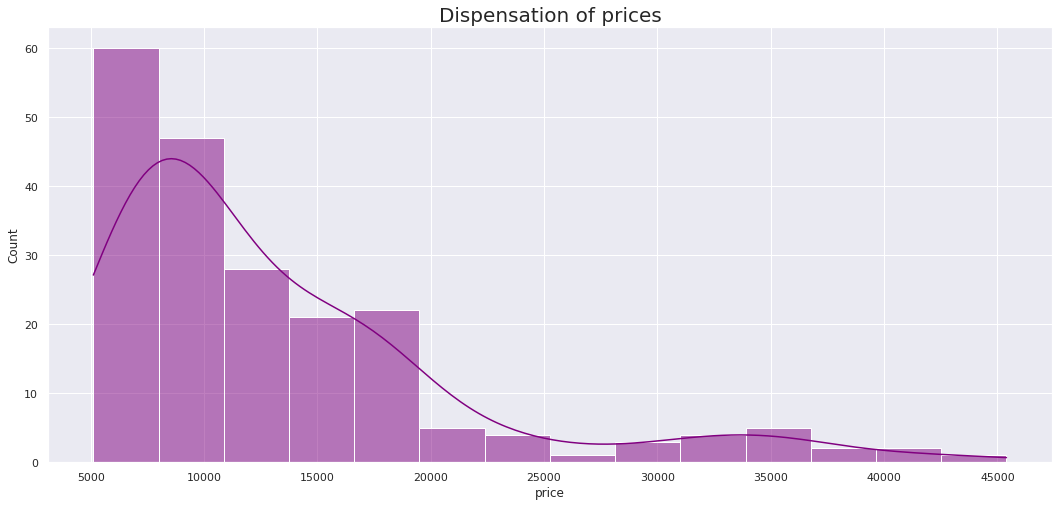

In [101]:
def freq_of_prices(dataset):
    
    # Let's plot the frequency of ratings
    plt.figure(figsize = (18, 8))
    plt.title('Dispensation of prices', fontsize=20)
    sns.histplot(data=dataset, x="price", kde=True, color= "purple")
    plt.show()
    
    
freq_of_prices(cars_dataset)

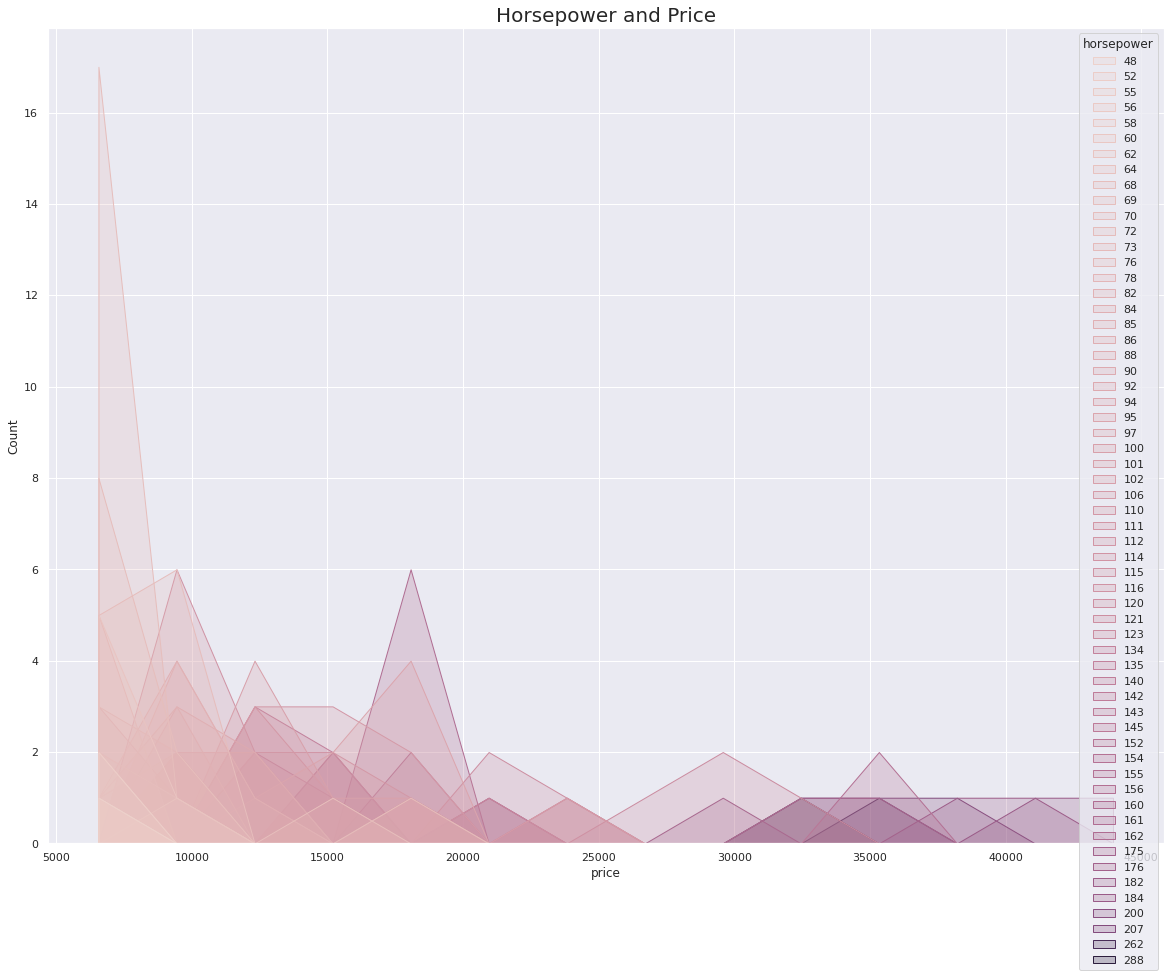

In [102]:
plt.figure(figsize = (20, 15))
plt.title('Horsepower and Price', fontsize=20)
sns.histplot(data=cars_dataset, x='price', hue='horsepower', element='poly')

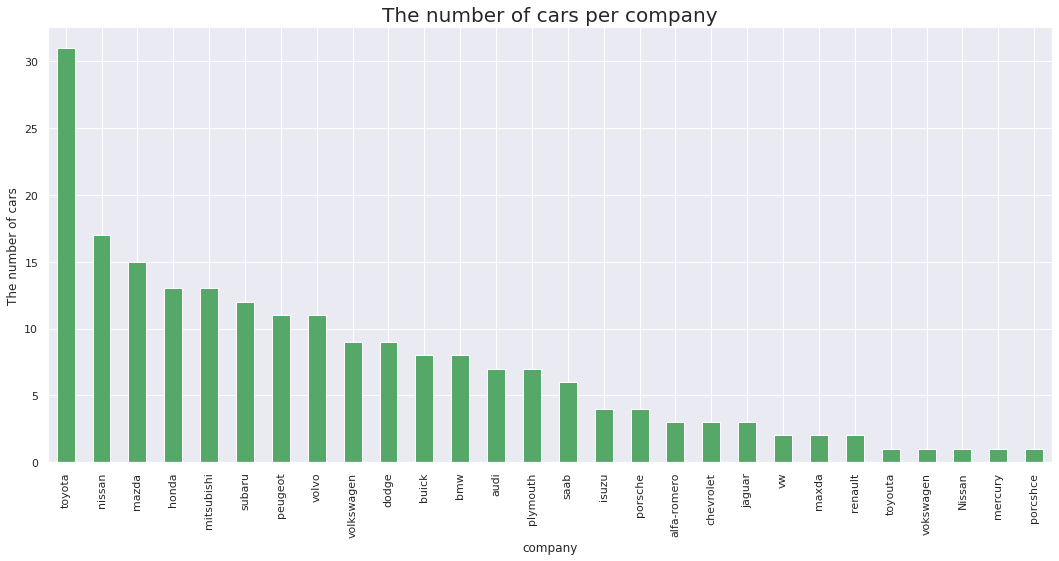

In [103]:
def category_with_many_apps(dataset):

    mcat = dataset['company'].value_counts()
    sns.set()
    plt.figure(figsize = (18, 8))
    plt.title('The number of cars per company', fontsize = 20)
    plt.ylabel('The number of cars')
    plt.xlabel('company')
    ax = mcat.plot.bar(y='speed', rot=90, color='g')
    plt.show()


category_with_many_apps(cars_dataset)

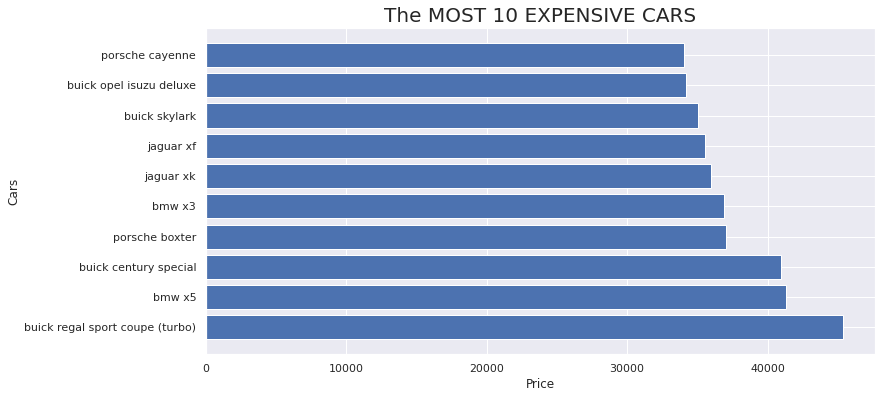

In [104]:
def most_expensive_cars(dataset):
    most_popular_pfa = dict(dataset.loc[dataset['price'] > dataset['price'].mean(), ['name', 'price']].nlargest(10, 'price').values)
    cars = list(most_popular_pfa.keys())
    price_c = list(most_popular_pfa.values())
    fig = plt.figure(figsize = (12, 6))
    plt.barh(cars, price_c)
    plt.title('The MOST 10 EXPENSIVE CARS', fontsize = 20)
    plt.ylabel('Cars')
    plt.xlabel('Price')
    plt.show()


most_expensive_cars(cars_dataset)

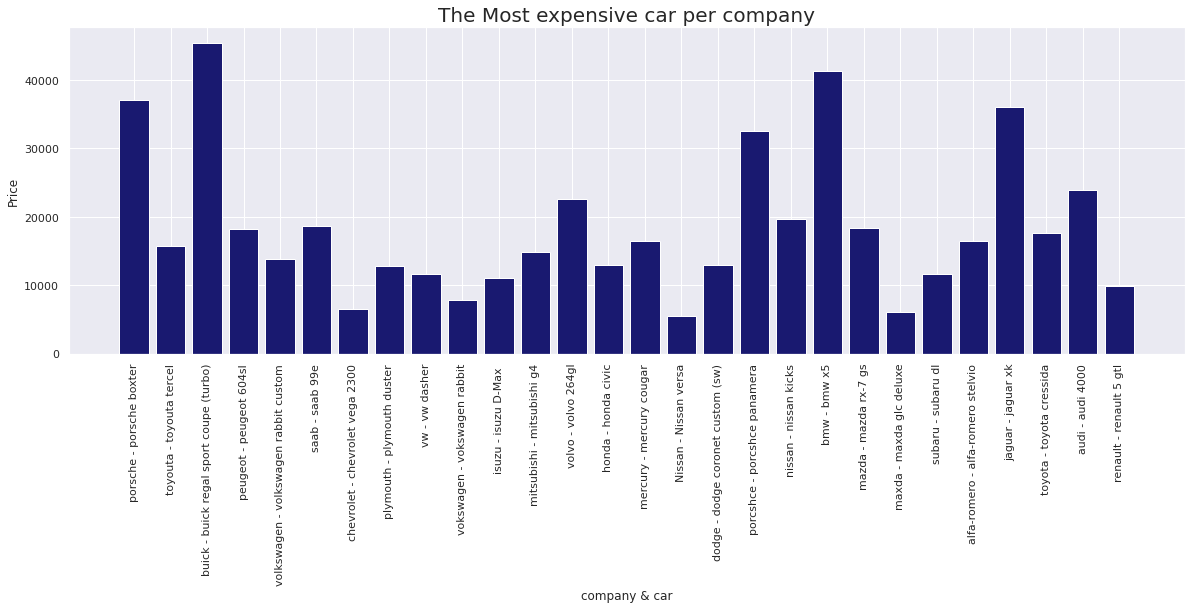

In [105]:
def most_exp_apps_percateg(dataset):

    # Plot The Most expensive apps per category
    most_exp_cars = []
    for i in list(set(dataset['company'])):
        most_exp_cars.append(dict(dataset.loc[(dataset['company'] == i), ['name', 'price']].nlargest(1, 'price').values))
    
    for i in most_exp_cars:
        most_exp_cars[0].update(i)
    mexp = most_exp_cars[0]
    j = pd.DataFrame(mexp.items(), columns=['name', 'price'])
    j['company'] = list(set(dataset['company']))
    j['company and name'] = j['company'].astype(str) +" - "+ j["name"]
    j.drop(['company', 'name'], inplace=True, axis=1)
    df = j[['company and name', 'price']]
    sns.set()
    plt.figure(figsize=(20,6)) 
    plt.bar(x=df['company and name'], 
        height=df['price'], 
        color='midnightblue') 
    plt.ylabel("Price")
    plt.xlabel("company & car")
    plt.xticks(rotation=90)
    plt.title('The Most expensive car per company', fontsize = 20)


most_exp_apps_percateg(cars_dataset)

In [106]:
# Encoding Categorical Columns

def replace_categ_columns(dataset):
    my_dict = {}
    c = 0
    for i in list(dataset.company.value_counts().index):
        my_dict[i] = c
        c += 1
    dataset.replace({'company': my_dict}, inplace=True)
    dataset.replace({'fueltypes': {'gas': 0, 'diesel': 1}}, inplace=True)
    dataset.replace({'aspiration': {'std': 0, 'turbo': 1}}, inplace=True)
    dataset.replace({'doornumbers': {'four': 4, 'two': 2}}, inplace=True)
    dataset.replace({'carbody': {'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 4}}, inplace=True)
    dataset.replace({'drivewheels': {'fwd': 0, 'rwd': 1, '4wd': 2}}, inplace=True)
    dataset.replace({'enginelocation': {'front': 0, 'rear': 1}}, inplace=True)
    dataset.replace({'enginetype': {'ohc': 0, 'ohcf': 1, 'ohcv': 2, 'dohc': 3, 'l': 4, 'rotor': 5, 'dohcv': 6}}, inplace=True)
    dataset.replace({'cylindernumber': {'four': 4, 'six': 6, 'five': 5, 'eight': 6, 'two': 2, 'three': 3, 'twelve': 12}}, inplace=True)
    dataset.replace({'fuelsystem': {'mpfi': 0, '2bbl': 1, 'idi': 2, '1bbl': 3, 'spdi': 4, '4bbl': 5, 'mfi': 6, 'spfi': 7}}, inplace=True)
    return dataset.head(10) 


replace_categ_columns(cars_dataset)

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,0,0,2,4,1,0,88.6,168.8,64.1,48.8,2548,3,4,130,0,3.47,2.68,9.0,111,5000,21,27,13495.000,17
1,2,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,168.8,64.1,48.8,2548,3,4,130,0,3.47,2.68,9.0,111,5000,21,27,16500.000,17
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,171.2,65.5,52.4,2823,2,6,152,0,2.68,3.47,9.0,154,5000,19,26,16500.000,17
3,4,2,audi 100 ls,0,0,4,0,0,0,99.8,176.6,66.2,54.3,2337,0,4,109,0,3.19,3.40,10.0,102,5500,24,30,13950.000,12
4,5,2,audi 100ls,0,0,4,0,2,0,99.4,176.6,66.4,54.3,2824,0,5,136,0,3.19,3.40,8.0,115,5500,18,22,17450.000,12
5,6,2,audi fox,0,0,2,0,0,0,99.8,177.3,66.3,53.1,2507,0,5,136,0,3.19,3.40,8.5,110,5500,19,25,15250.000,12
6,7,1,audi 100ls,0,0,4,0,0,0,105.8,192.7,71.4,55.7,2844,0,5,136,0,3.19,3.40,8.5,110,5500,19,25,17710.000,12
7,8,1,audi 5000,0,0,4,2,0,0,105.8,192.7,71.4,55.7,2954,0,5,136,0,3.19,3.40,8.5,110,5500,19,25,18920.000,12
8,9,1,audi 4000,0,1,4,0,0,0,105.8,192.7,71.4,55.9,3086,0,5,131,0,3.13,3.40,8.3,140,5500,17,20,23875.000,12
9,10,0,audi 5000s (diesel),0,1,2,1,2,0,99.5,178.2,67.9,52.0,3053,0,5,131,0,3.13,3.40,7.0,160,5500,16,22,17859.167,12


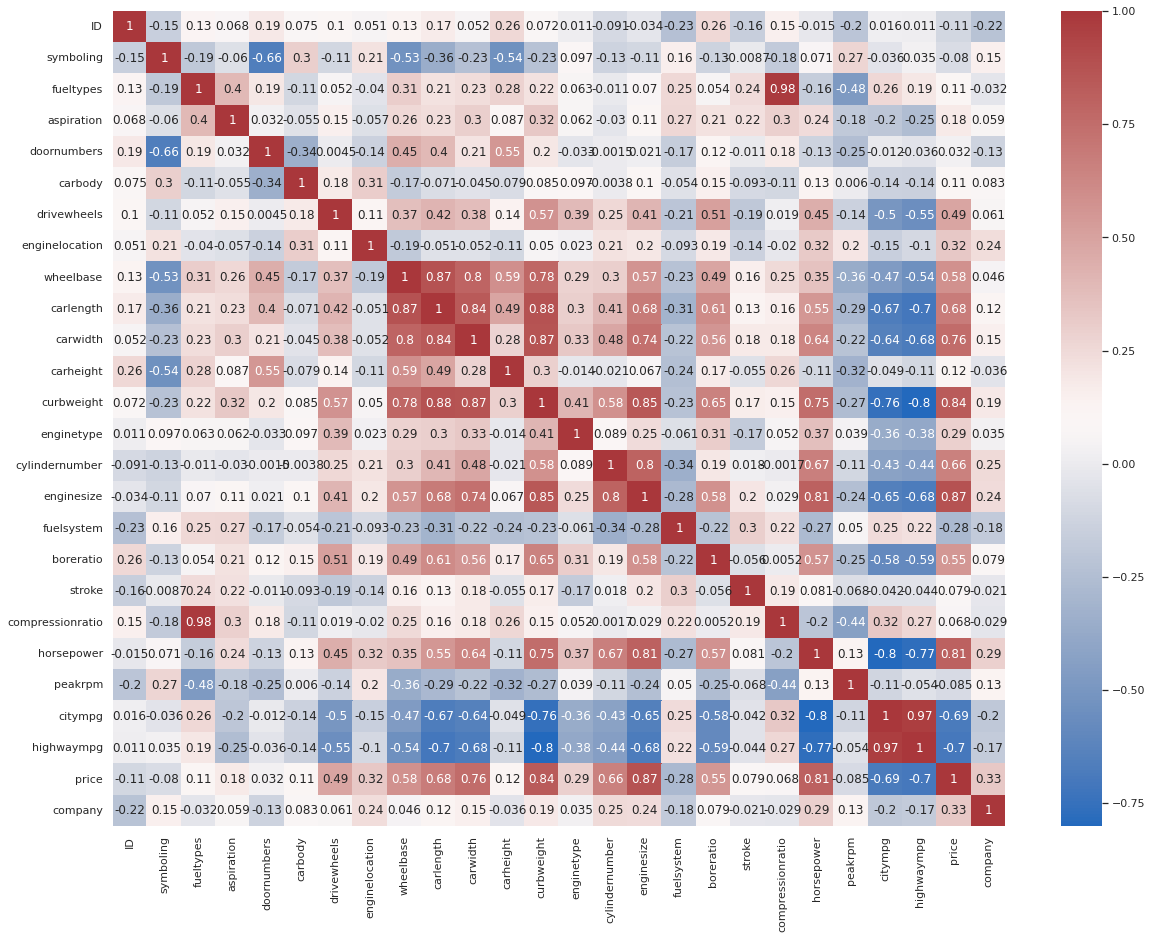

In [107]:
def compute_correlations_matrix(dataset):

    # Plot correlation of our dataset
    corrMatrix = dataset.corr()
    plt.figure(figsize=(20,15))
    sns.heatmap(corrMatrix, annot=True, cmap='vlag')
    plt.show()


compute_correlations_matrix(cars_dataset)

In [108]:
# let's make function that find highly correlated features

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # !We are interested in absolute coeff value
                colname = corr_matrix.columns[i] # Getting the name of the column
                col_corr.add(colname)
    return col_corr

need_to_remove = correlation(cars_dataset, 0.85)
need_to_remove.remove('price')
print(need_to_remove)

{'carlength', 'enginesize', 'curbweight', 'highwaympg', 'compressionratio'}


In [109]:
# Split dataset into features and target

X_row = cars_dataset.drop(['ID', 'name', 'price'], axis=1)
X = X_row.drop(need_to_remove, axis=1)
Y = cars_dataset['price']

In [110]:
print(X)

     symboling  fueltypes  aspiration  doornumbers  carbody  drivewheels  \
0            3          0           0            2        4            1   
1            3          0           0            2        4            1   
2            1          0           0            2        1            1   
3            2          0           0            4        0            0   
4            2          0           0            4        0            2   
..         ...        ...         ...          ...      ...          ...   
200         -1          0           0            4        0            1   
201         -1          0           1            4        0            1   
202         -1          0           0            4        0            1   
203         -1          1           1            4        0            1   
204         -1          0           1            4        0            1   

     enginelocation  wheelbase  carwidth  carheight  enginetype  \
0                 0 

In [111]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [112]:
# Splitting the data into Training Data and Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

## Linear Regression

In [113]:
# Model Training

model_lg = LinearRegression()
model_lg.fit(X_train, Y_train)

LinearRegression()

In [114]:
training_data_pred = model_lg.predict(X_train)

In [115]:
error_score = metrics.r2_score(Y_train, training_data_pred)
print('R squared error:', error_score)

R squared error: 0.8501355216056699


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

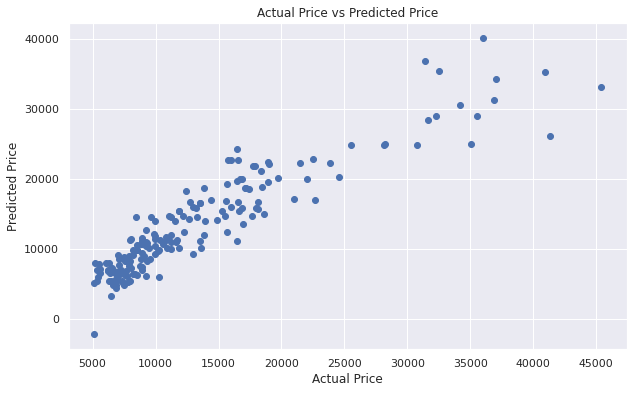

In [116]:
sns.set()
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

In [117]:
test_data_pred = model_lg.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_pred)
print('R squared error:', error_score)

R squared error: 0.8671456576420302


Text(0.5, 1.0, 'Actual Price vs Predicted Price')

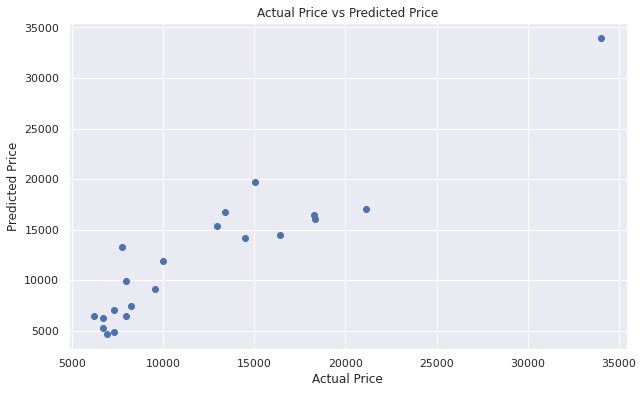

In [118]:
sns.set()
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

## Lasso Regression

In [119]:
# https://ranalytics.github.io/data-mining/042-Regularization.html

In [120]:
# loading the linear regression model

lass_reg_model = Lasso()

In [121]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [122]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [123]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8501308570822151


Visualize the actual prices and Predicted prices

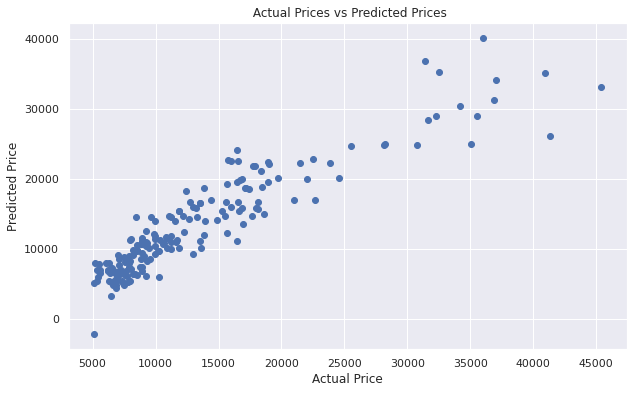

In [124]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [125]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [126]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8682315015921742


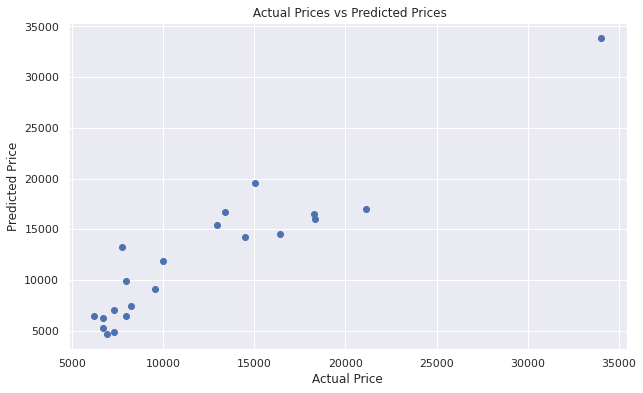

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()